In [1]:
import matplotlib.pyplot as plt 
import numpy.ma as ma
import xarray as xr
import pandas as pd
import numpy as np
# ds083 GFS NAM
# p1s1 p2s2 p7s7

In [2]:
expruns = ['20120816_d03_gfs05_p1r1', '20120816_d03_gfs05_p1r3','20120816_d03_gfs05_p1r5',
           '20120816_d03_gfs05_p2r1', '20120816_d03_gfs05_p2r3','20120816_d03_gfs05_p2r5']
expnames = ['g1r1', 'g1r3', 'g1r5', 'g2r1', 'g2r3', 'g2r5']
levlabel = ['30m', '40m', '50m', '100m', '150m', '200m', '250m', '300m', '350m', '400m', '450m', '500m']
expruns[1]

'20120816_d03_gfs05_p1r3'

In [3]:
# READ WRF INTERP DATA
ids = [0,1,2,7,12,17,22,27,32,37,42,47]
t1, t2, t3, t4 = '2012-08-16 12:00', '2012-08-17 12:00', '2012-08-18 12:00', '2012-08-19 12:00'

wrf1 = xr.open_dataset('interp30/sodar_g1r1.nc')['uv30'].values
wrf2 = xr.open_dataset('interp30/sodar_g1r3.nc')['uv30'].values
wrf3 = xr.open_dataset('interp30/sodar_g1r5.nc')['uv30'].values
wrf4 = xr.open_dataset('interp30/sodar_g2r1.nc')['uv30'].values
wrf5 = xr.open_dataset('interp30/sodar_g2r3.nc')['uv30'].values
wrf6 = xr.open_dataset('interp30/sodar_g2r5.nc')['uv30'].values


drw1 = xr.open_dataset('interp30/sodar_g1r1.nc')['wd30'].values
drw2 = xr.open_dataset('interp30/sodar_g1r3.nc')['wd30'].values
drw3 = xr.open_dataset('interp30/sodar_g1r5.nc')['wd30'].values
drw4 = xr.open_dataset('interp30/sodar_g2r1.nc')['wd30'].values
drw5 = xr.open_dataset('interp30/sodar_g2r3.nc')['wd30'].values
drw6 = xr.open_dataset('interp30/sodar_g1r5.nc')['wd30'].values

tv1 = xr.open_dataset('interp30/sodar_g1r1.nc')['tv30'].values
tv2 = xr.open_dataset('interp30/sodar_g1r3.nc')['tv30'].values
tv3 = xr.open_dataset('interp30/sodar_g1r5.nc')['tv30'].values
tv4 = xr.open_dataset('interp30/sodar_g2r1.nc')['tv30'].values
tv5 = xr.open_dataset('interp30/sodar_g2r3.nc')['tv30'].values
tv6 = xr.open_dataset('interp30/sodar_g2r5.nc')['tv30'].values


sread_w =  pd.read_pickle('sodar_sp.pk')
sread_d =  pd.read_pickle('sodar_dd.pk')
sread_t =  pd.read_pickle('sodar_tv.pk')

sodarw =  sread_w.iloc[:,ids][t1:t4].interpolate().values
sodard =  sread_d.iloc[:,ids][t1:t4].interpolate().values
sodart =  sread_t.iloc[:,ids][t1:t4].interpolate().values
sodw =  sread_w.iloc[:,ids][t1:t4]

x1 = sread_w.iloc[:,ids][t1:t2].index
x2 = sread_w.iloc[:,ids][t2:t3].index
x3 = sread_w.iloc[:,ids][t3:t4].index

sodarw1 = sread_w.iloc[:,ids][t1:t2].interpolate().values
sodarw2 = sread_w.iloc[:,ids][t2:t3].interpolate().values
sodarw3 = sread_w.iloc[:,ids][t3:t4].interpolate().values
sodart1 = sread_t.iloc[:,ids][t1:t2].interpolate().values
sodart2 = sread_t.iloc[:,ids][t2:t3].interpolate().values
sodart3 = sread_t.iloc[:,ids][t3:t4].interpolate().values
levs=[30,40,50,100,150,200,250,300,350,400,450,500]

In [4]:
ids = [0,1,2,7,12,17,22,27,32,37,42,47]
t1, t2 = '2012-08-16 12:00', '2012-08-19 12:00'
sodw =  sread_w.iloc[:,ids][t1:t2]
sodt =  sread_t.iloc[:,ids][t1:t2]

inds = np.append(np.arange(48,72),np.arange(96,120))
indl = np.append(np.arange(24,48),np.arange(72,96))
sea = sodw.iloc[inds]
llj = sodw.iloc[indl]
seat = sodt.iloc[inds]
lljt = sodt.iloc[indl]
w1s = wrf1[inds]
print(sea.shape, indl.shape, inds.shape)

(48, 12) (48,) (48,)


In [5]:
lev = 3
# TODOS LOS EXPERIMENTOS WRF SEA BREEZE
sodmsk = ma.masked_invalid(sea) 
inv = sodmsk.mask
idx = ~inv
sodmsk.shape
test = 'wrf'
# TODOS LOS MODELOS UN SOLO NIVEL WRF1...WRF12
#print('TODOS LOS MODELOS NIVEL '+levlabel[lev])
#wrf = eval(exp[inds,lev][idx[:,lev]])
p = [eval(test+str(i)+'[inds,lev][idx[:,lev]]') for i in range(1,7)]
pm = [np.mean(p[i]) for i in range(6)] 
r = [sodmsk[:,lev][idx[:,lev]].data for i in range(6)]
rm = [np.mean(r[i]) for i in range(6)]
p_pm = [(p[i] - pm[i]) for i in range(6)]
r_rm = [(r[i] - rm[i]) for i in range(6)]
crmsd = [np.sqrt(np.average(np.square((p_pm[i]) - (r_rm[i])))) for i in range(6)]
sdevp = [np.std(p[i]) for i in range(6)]
sdevr = [np.std(r[i]) for i in range(6)]
#  ratio:  Case_Variance/Reference_Variance
ratio = [(np.var(p[i]) / np.var(r[i])) for i in range(6)]
bias = [(np.average(p[i]) - np.average(r[i])) for i in range(6)]
sdev = [[sdevr[i], sdevp[i]] for i in range(6)];
ccoef =[ np.corrcoef(r[i], p[i])[1,0] for i in range(6)]
sdev = np.array(np.append(sdevr[0], sdevp))
crmsd = np.array(np.append(0, crmsd))
ccoef = np.array(np.append(1, ccoef))
bias = np.append(0,bias)
ratio = np.append(1,ratio)
print(test, sdev[0], crmsd[0], ccoef[0])


wrf 2.8576423408579124 0.0 1.0


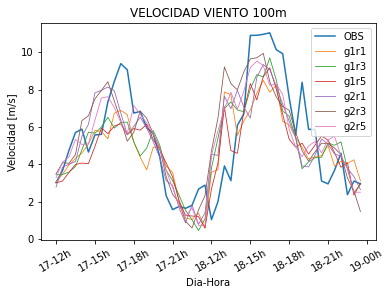

In [6]:
#plt.plot(p)
plt.figure(figsize=(6,4))
plt.plot(r[0], label='OBS')
for i in range(6):
    plt.plot(p[i], label=expnames[i], linewidth=.8)

plt.legend()
plt.xticks(6*np.arange(9), ['17-12h','17-15h','17-18h','17-21h','18-12h','18-15h','18-18h','18-21h','19-00h'], rotation=30);
plt.ylabel('Velocidad [m/s]')
plt.xlabel('Dia-Hora')

plt.title('VELOCIDAD VIENTO '+levlabel[lev]);

In [7]:
xnames=['OBS_'+levlabel[lev]]+expnames
media = np.array(np.append(rm[0], pm))
import pandas as pd
pd.options.display.float_format = '{:.3f}'.format
print ('SEA BREEZE WIND NIVEL '+levlabel[lev])
pd.DataFrame([media,bias,sdev,ratio,ccoef], columns=xnames, index=['media','bias','sdev','ratio','ccoef'])


SEA BREEZE WIND NIVEL 100m


,OBS_100m,g1r1,g1r3,g1r5,g2r1,g2r3,g2r5
media,5.416,4.850,5.019,4.785,5.248,5.534,5.354
bias,0.000,-0.566,-0.397,-0.631,-0.168,0.118,-0.062
sdev,2.858,1.881,2.066,1.939,2.202,2.427,2.211
ratio,1.000,0.433,0.523,0.461,0.594,0.721,0.598
ccoef,1.000,0.757,0.762,0.821,0.740,0.709,0.770


wrf 2.8576423408579124 0.0 1.0


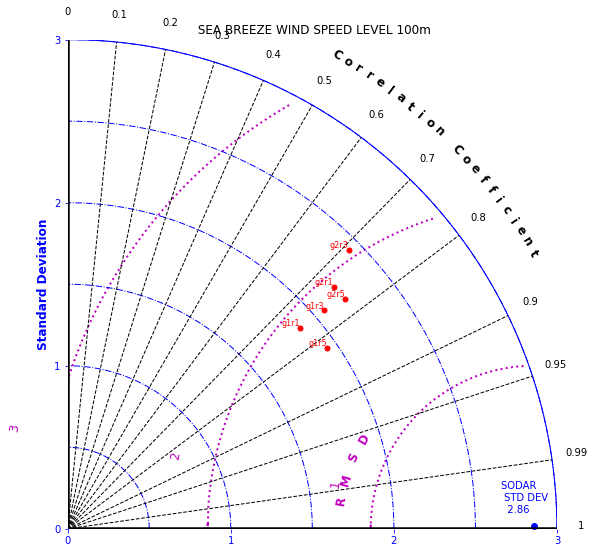

In [8]:
import skill_metrics as sm
plt.figure(figsize=(10,9))

label = ['REF', expnames[0],  expnames[1], expnames[2], expnames[3], expnames[4], expnames[5] ]
sm.taylor_diagram(sdev,crmsd,ccoef, markerLabel = label, markerLabelColor = 'r', 
                  tickRMS= np.arange(1,4,1), tickRMSangle = 170.0, 
                  colRMS = 'm', styleRMS = ':', widthRMS = 2.0,
                  tickSTD = np.arange(0,3.5,0.5), axismax = 3.0,
                  colSTD = 'b', styleSTD = '-.', widthSTD = 1.0,
                  colCOR = 'k', styleCOR = '--', widthCOR = 1.0)
plt.title(' SEA BREEZE WIND SPEED LEVEL '+levlabel[lev], y=1.0);
sodsdev = "{:.2f}".format( sdev[0] )
plt.scatter(sdev[0],0.02, color='b')
plt.annotate('SODAR \n STD DEV \n  '+sodsdev, (sdev[0]-.2, 0.1), color='b');
print(test, sdev[0], crmsd[0], ccoef[0])


In [9]:
xnames=['OBS_'+levlabel[lev]]+expnames
media = np.array(np.append(rm[0], pm))
import pandas as pd
print ('SEA BREEZE WIND NIVEL '+levlabel[lev])
pd.DataFrame([media,bias,sdev,ratio,ccoef], columns=xnames, index=['media','bias','sdev','ratio','ccoef']).T


SEA BREEZE WIND NIVEL 100m


,media,bias,sdev,ratio,ccoef
OBS_100m,5.416,0.000,2.858,1.000,1.000
g1r1,4.850,-0.566,1.881,0.433,0.757
g1r3,5.019,-0.397,2.066,0.523,0.762
g1r5,4.785,-0.631,1.939,0.461,0.821
g2r1,5.248,-0.168,2.202,0.594,0.740
g2r3,5.534,0.118,2.427,0.721,0.709
g2r5,5.354,-0.062,2.211,0.598,0.770


In [10]:
# VIRTUAL TEMPERATURE SEA BREEZE #

In [11]:
# TODOS LOS EXPERIMENTOS WRF SEA BREEZE
sodmsk = ma.masked_invalid(seat) 
inv = sodmsk.mask
idx = ~inv
sodmsk.shape
test = 'tv'
# TODOS LOS MODELOS UN SOLO NIVEL WRF1...WRF12
#print('TODOS LOS MODELOS NIVEL '+levlabel[lev])
#wrf = eval(exp[inds,lev][idx[:,lev]])
p = [eval(test+str(i)+'[inds,lev][idx[:,lev]]') for i in range(1,7)]
pm = [np.mean(p[i]) for i in range(6)] 
r = [sodmsk[:,lev][idx[:,lev]].data for i in range(6)]
rm = [np.mean(r[i]) for i in range(6)]
p_pm = [(p[i] - pm[i]) for i in range(6)]
r_rm = [(r[i] - rm[i]) for i in range(6)]
crmsd = [np.sqrt(np.average(np.square((p_pm[i]) - (r_rm[i])))) for i in range(6)]
sdevp = [np.std(p[i]) for i in range(6)]
sdevr = [np.std(r[i]) for i in range(6)]
sdev = [[sdevr[i], sdevp[i]] for i in range(6)];
ccoef =[ np.corrcoef(r[i], p[i])[1,0] for i in range(6)]
sdev = np.array(np.append(sdevr[0], sdevp))
crmsd = np.array(np.append(0, crmsd))
ccoef = np.array(np.append(1, ccoef))
print(test, sdev[0], crmsd[0], ccoef[0])

tv 1.8880843006573855 0.0 1.0


tv 1.8880843006573855 2.3385841846466064 0.0 1.0


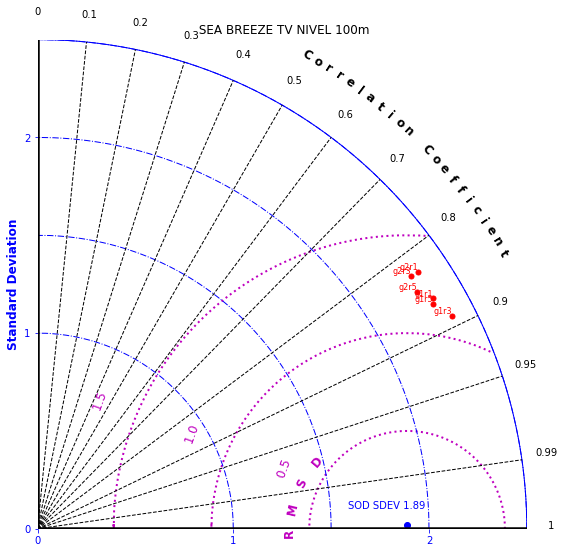

In [12]:
import skill_metrics as sm
plt.figure(figsize=(10,9))

label = ['REF', expnames[0],  expnames[1], expnames[2], expnames[3], expnames[4], expnames[5] ]
sm.taylor_diagram(sdev,crmsd,ccoef, markerLabel = label, markerLabelColor = 'r', 
                  tickRMS= np.arange(0.5,2,0.5), tickRMSangle = 160.0, 
                  colRMS = 'm', styleRMS = ':', widthRMS = 2.0,
                  tickSTD = np.arange(1,3,0.5), axismax = 2.5,
                  colSTD = 'b', styleSTD = '-.', widthSTD = 1.0,
                  colCOR = 'k', styleCOR = '--', widthCOR = 1.0)
plt.title(' SEA BREEZE TV NIVEL '+levlabel[lev], y=1.0);
sodsdev = "{:.2f}".format( sdev[0] )
plt.scatter(sdev[0],0.02, color='b')
plt.annotate('SOD SDEV '+sodsdev, (sdev[0]-0.3, 0.1), color='b');
print(test, sdev[0], sdev[1], crmsd[0], ccoef[0])


In [13]:
xnames=['OBS_'+levlabel[lev]]+expnames
media = np.array(np.append(rm[0], pm))
import pandas as pd
print ('SEA BREEZE TV NIVEL '+levlabel[lev])
pd.DataFrame([media,sdev,crmsd,ccoef], columns=xnames, index=['media','sdev','crmsd','ccoef']).T


SEA BREEZE TV NIVEL 100m


,media,sdev,crmsd,ccoef
OBS_100m,25.868,1.888,0.000,1.000
g1r1,27.723,2.339,1.184,0.864
g1r3,27.598,2.379,1.110,0.890
g1r5,27.662,2.327,1.157,0.869
g2r1,27.332,2.347,1.314,0.829
g2r3,27.203,2.305,1.292,0.828
g2r5,27.339,2.286,1.210,0.849


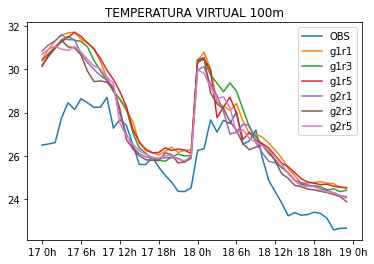

In [14]:
#plt.plot(p)
plt.plot(r[0], label='OBS')
for i in range(6):
    plt.plot(p[i], label=expnames[i])

plt.legend()
plt.xticks(6*np.arange(9), ['17 0h','17 6h','17 12h','17 18h','18 0h','18 6h','18 12h','18 18h','19 0h']);
plt.title('TEMPERATURA VIRTUAL '+levlabel[lev]);

In [15]:
dicts = {}
keys = range(4)
values = ["Hi", "I", "am", "John"]
for i in keys:
        dicts[i] = values[i]
print(dicts)

{0: 'Hi', 1: 'I', 2: 'am', 3: 'John'}


[1.         0.86410388 0.88960356 0.86943787 0.82910249 0.82814247
 0.84860025] [5 4 6 1 3 2 0]


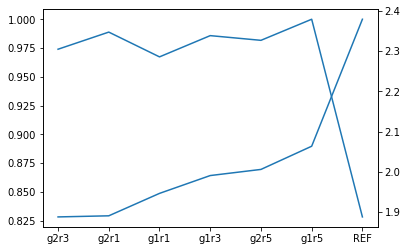

In [16]:
label = ['REF', expnames[0],  expnames[1], expnames[2], expnames[3], expnames[4], expnames[5] ]
xsorted = np.argsort(ccoef)
ccoef

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(ccoef[xsorted])
ax2.plot(sdev[xsorted])

plt.xticks(np.arange(7), [label[5],label[4],label[1],label[2],label[6],label[3],label[0]])
print(ccoef, xsorted)

[1.         0.86410388 0.88960356 0.86943787 0.82910249 0.82814247
 0.84860025] [5 4 6 1 3 2 0]


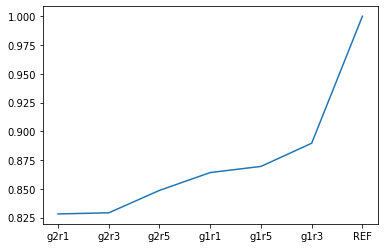

In [17]:
label = ['REF', expnames[0],  expnames[1], expnames[2], expnames[3], expnames[4], expnames[5] ]
xsorted = np.argsort(ccoef)
ccoef
plt.plot(ccoef[xsorted])
plt.xticks(np.arange(7), [label[4],label[5],label[6],label[1],label[3],label[2],label[0]])
print(ccoef, xsorted)